## Notebook example in virtual box

This notebook intends to show how you can access and run over ATLAS Open Data in a notebook, when running a virtual machine with CERN CentOS 7. When you are inside the virtual machine open a terminal and run _jupyter notebook_. The notebook will then open. Then clic the "New" button, and choose "ROOT C++". 

Here follows a short example of how to read ATLAS Open Data and make a simple plot. This example only includes real data. See other notebooks for exmples with Monte Carlo background as well.  

In [1]:
TChain *data = new TChain("mini"); // make a TChain

In [2]:
data->Add("http://opendata.atlas.cern/release/samples/Data/DataEgamma.root"); // Add data samples to the TChain
data->Add("http://opendata.atlas.cern/release/samples/Data/DataMuons.root");

In [3]:
Int_t lep_n, lep_charge[2], lep_type[2]; 
Float_t lep_pt[2], lep_E[2], lep_phi[2], lep_eta[2];  
Bool_t passGRL, hasGoodVertex; 
Float_t lep_etcone20[2], lep_ptcone30[2]; 
Int_t lep_flag[2]; 

In [4]:
data->SetBranchAddress("lep_n",      &lep_n);
data->SetBranchAddress("lep_charge", &lep_charge);
data->SetBranchAddress("lep_type",   &lep_type);
data->SetBranchAddress("lep_pt",     &lep_pt);
data->SetBranchAddress("lep_eta",    &lep_eta);
data->SetBranchAddress("lep_phi",    &lep_phi);
data->SetBranchAddress("lep_E",      &lep_E);
data->SetBranchAddress("passGRL", &passGRL); 
data->SetBranchAddress("hasGoodVertex", &hasGoodVertex); 
data->SetBranchAddress("lep_flag", &lep_flag); 
data->SetBranchAddress("lep_ptcone30", &lep_ptcone30); 
data->SetBranchAddress("lep_etcone20", &lep_etcone20); 

In [7]:
TLorentzVector dilepton; 
TLorentzVector l1, l2; 

In [6]:
TH1F *hist_m = new TH1F("hist_m", "Invariant mass", 20, 0, 500); 

In [17]:
hist_m->Reset(); 

In [18]:
cout << "Looping over " << data->GetEntries() << " events...." << endl; 
for(int i = 0; i < data->GetEntries(); i++){
    
    if( i%1000000 == 0 && i>0){ cout << i/1000000 << " million events processed" << endl;}
    if(!(i%100 == 0)){ continue; }  // Only keep 1 in 1000 events (for testing purposes) 
    
    data->GetEntry(i);     

    // Data quality cuts: 

    if(passGRL == 0){ continue; } 
    if(hasGoodVertex == 0){ continue; }
    //if(trigM == 0 && trigE == 0){ continue; } 

    // Require "good leptons": 
    
    if( lep_pt[0]/1000.0 < 25 ){ continue; }
    if( lep_etcone20[0]/lep_pt[0] > 0.15 ){ continue; }
    if( lep_ptcone30[0]/lep_pt[0] > 0.15 ){ continue; }
    if( !(lep_flag[0] & 512) ){ continue; }

    if( lep_pt[1]/1000.0 < 25 ){ continue; }
    if( lep_etcone20[1]/lep_pt[1] > 0.15 ){ continue; }
    if( lep_ptcone30[1]/lep_pt[1] > 0.15 ){ continue; }
    if( !(lep_flag[1] & 512) ){ continue; }
    
    // Event selection: 

    // Cut #1: Require (exactly) 2 leptons
    if(lep_n != 2){ continue; }
    // Cut #2: Require opposite charge
    if(lep_charge[0] == lep_charge[1]){ continue; }
    // Cut #3: Require same flavour (2 electrons or 2 muons)
    if(lep_type[0] != lep_type[1]){ continue; }

    // Set Lorentz vectors: 
    l1.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.);
    l2.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.);
    // Variables are stored in the TTree with unit MeV, so we need to divide by 1000 
    // to get GeV, which is a more practical and commonly used unit. 

    dilepton = l1 + l2;       
 
    hist_m->Fill(dilepton.M()); 

}
cout << "Done!" << endl; 

Looping over 14945674 events....
1 million events processed
2 million events processed
3 million events processed
4 million events processed
5 million events processed
6 million events processed
7 million events processed
8 million events processed
9 million events processed
10 million events processed
11 million events processed
12 million events processed
13 million events processed
14 million events processed
Done!


In [20]:
gPad->SetLogy();

In [33]:
hist_m->SetFillColor(kBlue); 
hist_m->GetYaxis()->SetTitle("# events");
hist_m->GetYaxis()->SetTitleOffset(1.3); 
hist_m->GetXaxis()->SetTitle("m_{ll} (GeV)");
hist_m->GetXaxis()->SetTitleOffset(1.3);

In [ ]:
TCanvas *c = new TCanvas("c", "c", 10, 10, 700, 700); 

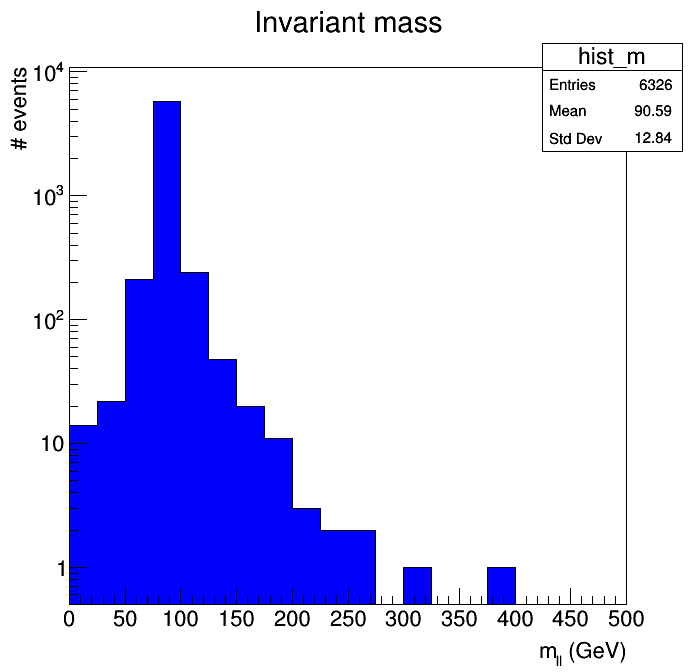

In [34]:
hist_m->Draw(); 
c->Draw(); 